In this notebook, we show how to sample question data based on difficulty, and to avoid mismatch in domain adaptation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gaussian_kde
np.random.seed(10)

Here, we consider beta distribution as example of question difficulty distribution. They both only take values between 0 and 1.

In [7]:

X_plot = np.linspace(0, 1, 1000)
true_dens_s = beta(2, 3).pdf(X_plot)
true_dens_t = beta(6, 3).pdf(X_plot)

Plot the original source and target distribution.

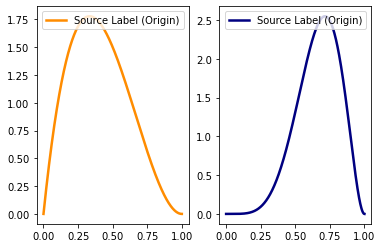

In [8]:
_, ax = plt.subplots(1, 2)
ax[0].plot(X_plot, true_dens_s, color='darkorange', lw=2.5, linestyle='-', label="Source Label (Origin)")
ax[0].legend(loc='upper right')
ax[1].plot(X_plot, true_dens_t, color='navy', lw=2.5, linestyle='-', label="Source Label (Origin)")
ax[1].legend(loc='upper right')
plt.show()

If we random draw some samples from this two distribution, and feed into domain adaptation model,
 the label mismatch will be harmful and decrease the performance. Instead, we sample from the neighbour area of the same points, for example this grey area.

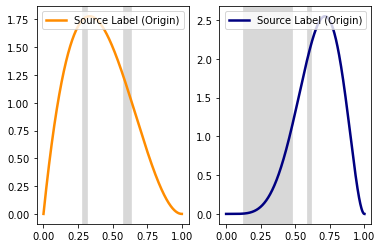

In [12]:
_, ax = plt.subplots(1, 2)
ax[0].axvline(0.3, lw=10/true_dens_s[300], alpha=0.3, color='grey')
ax[0].axvline(0.6, lw=10/true_dens_s[600], alpha=0.3, color='grey')
ax[0].plot(X_plot, true_dens_s, color='darkorange', lw=2.5, linestyle='-', label="Source Label (Origin)")
ax[0].legend(loc='upper right')
ax[1].axvline(0.3, lw=10/true_dens_t[300], alpha=0.3, color='grey')
ax[1].axvline(0.6, lw=10/true_dens_t[600], alpha=0.3, color='grey')
ax[1].plot(X_plot, true_dens_t, color='navy', lw=2.5, linestyle='-', label="Source Label (Origin)")
ax[1].legend(loc='upper right')
plt.show()

Below is a simple implement of drawing from grey area.

In [15]:
w = [0.008, 0.004]
X_s = np.random.beta(2, 3, 1000)
X_t = np.random.beta(6, 3, 1000)
SX = np.linspace(min(X_s.max(), X_t.max()) * 1000, max(X_s.min(), X_t.min()) * 1000, 60)
S_s = []
S_t = []

for x in SX:
    q = [y for y in X_s if np.abs(x / 1000 - y) <= w[0] / true_dens_s[int(x)]]
    S_s.append(np.random.choice(q))
    q = [y for y in X_t if np.abs(x / 1000 - y) <= w[1] / true_dens_t[int(x)]]
    S_t.append(np.random.choice(q))

Finally, we plot the pdf of sample batch. The two batch are aligned compared with original distributions.

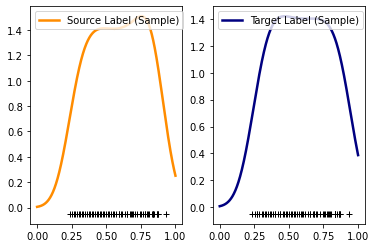

In [16]:
_, ax = plt.subplots(1, 2)

kde_s = gaussian_kde(S_s)
dens = kde_s.evaluate(X_plot)
ax[0].plot(X_plot, dens, color='darkorange', lw=2.5, linestyle='-', label="Source Label (Sample)")
ax[0].legend(loc='upper left')
ax[0].plot(S_s, -0.05 - 0.1 * np.zeros(len(S_s)), '+k')

kde_t = gaussian_kde(S_t)
dens = kde_t.evaluate(X_plot)
ax[1].plot(X_plot, dens, color='navy', lw=2.5, linestyle='-', label="Target Label (Sample)")
ax[1].legend(loc='upper left')
ax[1].plot(S_s, -0.05 - 0.1 * np.zeros(len(S_s)), '+k')

plt.show()
